In [1]:
from code.io.EventProcessor import EventProcessor
from code.io.TrackingProcessor import TrackingProcessor
from code.io.PossessionProcessor import PossessionProcessor
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\FFmpeg\bin\ffmpeg.exe'

GAME_ID = "0022300869"

event_df = EventProcessor.load_games()
tracking_df = TrackingProcessor.load_games()
possession_df = PossessionProcessor.load_games()

In [2]:


from code.util.VisUtil import VisUtil

# shot_rebound_df = EventProcessor.extract_shots_and_rebounds(event_df, tracking_df)
# VisUtil.plot_court_hexmap(shot_rebound_df, x_col="rebound_x", y_col="rebound_y", label="Rebound Distribution")

In [3]:
from code.util.StatsUtil import StatsUtil

# true_point_events = StatsUtil.calculate_true_points(event_df)
# true_point_events.to_csv('true_points.csv')
# true_point_events['true_points_produced'].value_counts()

In [4]:
transition_events = EventProcessor.extract_transition_opportunities(event_df)
event = transition_events[0]
start, end = EventProcessor.get_start_end_time_of_event(event)
moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, start, end)
possession = PossessionProcessor.extract_possession_by_timestamp(possession_df, end)


In [5]:
# anim = VisUtil(moment_df)
# anim.plot_voronoi_at_timestamp(end, possession["basketX"])

In [6]:
from code.io.ActionProcessor import ActionProcessor

shot_rebound_df = ActionProcessor.extract_shots_and_rebounds(event_df, tracking_df, possession_df)
StatsUtil.calculate_rebound_chances(moment_df, shot_rebound_df, end, possession["basketX"])
shot_rebound_df

,shot_x,shot_y,rebound_x,rebound_y,shot_time,rebound_time,rebound_teamId,basket_x
0,-30.05,0.35,-39.46,3.98,1702773744600,1702773745880,1610612737,-41.75
1,42.44,-22.00,-122.72,0.49,1702773806280,1702773808480,1610612739,41.75
2,-23.13,15.07,NaN,NaN,1702773858000,1702773862120,1610612739,-41.75
3,33.37,6.39,-120.63,0.41,1702773896040,1702773897680,1610612739,41.75
4,34.61,22.21,-126.23,7.68,1702773922320,1702773924400,1610612739,41.75
...,...,...,...,...,...,...,...,...
999,27.81,8.54,-126.58,-4.55,1709437076600,1709437078200,1610612743,41.75
1000,38.79,1.42,-124.15,-0.27,1709437113480,1709437114720,1610612743,41.75
1001,25.59,19.71,-124.90,-3.46,1709437277120,1709437278600,1610612743,41.75
1002,-19.06,-7.94,-43.92,-9.70,1709437298400,1709437300320,1610612743,-41.75


shot_classification
None                  338
RESTRICTED_AREA       221
RIGHT_WING_THREE      111
CENTER_THREE           93
LEFT_WING_THREE        91
RIGHT_CORNER_THREE     51
LEFT_CORNER_THREE      48
RIGHT_BASELINE_MID     31
LEFT_BASELINE_MID      16
BEYOND_HALFCOURT        4
Name: count, dtype: int64


c:\Users\dkste\Dev\TrueImpactShotCharts\code\util\VisUtil.py:558: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = MplPolygon(list(polygon.exterior.coords), closed=True, edgecolor='k', fill=True, color=ShotRegionUtil.region_colors[region], alpha=0.3, linewidth=1.5, linestyle='--')


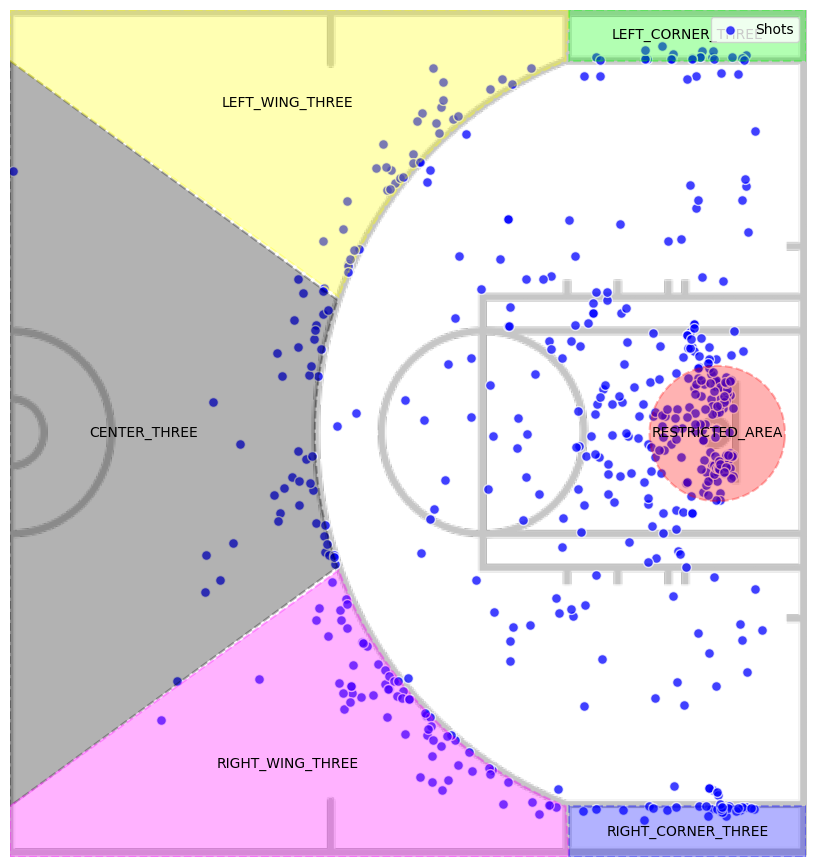

In [7]:
from code.util.FeatureUtil import FeatureUtil
shot_rebound_classified_df = FeatureUtil.classify_shot_locations(shot_rebound_df, possession_df, FeatureUtil.classify_shot_region)
print(shot_rebound_classified_df['shot_classification'].value_counts(dropna=False))
shot_rebound_classified_df.loc[shot_rebound_classified_df['shot_classification'].isna()]
VisUtil.plot_shots_and_regions(shot_rebound_classified_df)
# possession = PossessionProcessor.extract_possesion_by_timestamp(possessions_df, start)
# cross_3pt = FeatureUtil.find_ball_crossing_far_three_point_line(moment_df, possession.iloc[0]["basketX"])
# cross_half = FeatureUtil.find_ball_crossing_halfcourt(moment_df, possession.iloc[0]["basketX"])
# in_zone_of_death = FeatureUtil.find_ball_moment(moment_df, FeatureUtil.is_in_zone_of_death, possession.iloc[0]["basketX"])
# print(cross_3pt, cross_half, in_zone_of_death)

In [8]:
# moment_df = TrackingProcessor.extract_moment_from_timestamps(tracking_df, 1702773793560, 1702773808480)
# anim = VisUtil(moment_df)
# #anim.display_animation(possession.iloc[0])
# #possession = PossessionProcessor.extract_possesion_by_timestamp(possession_df, end)
# anim.plot_voronoi_at_timestamp(1702773806280, 41.75)